<a href="https://colab.research.google.com/github/Finkovski/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

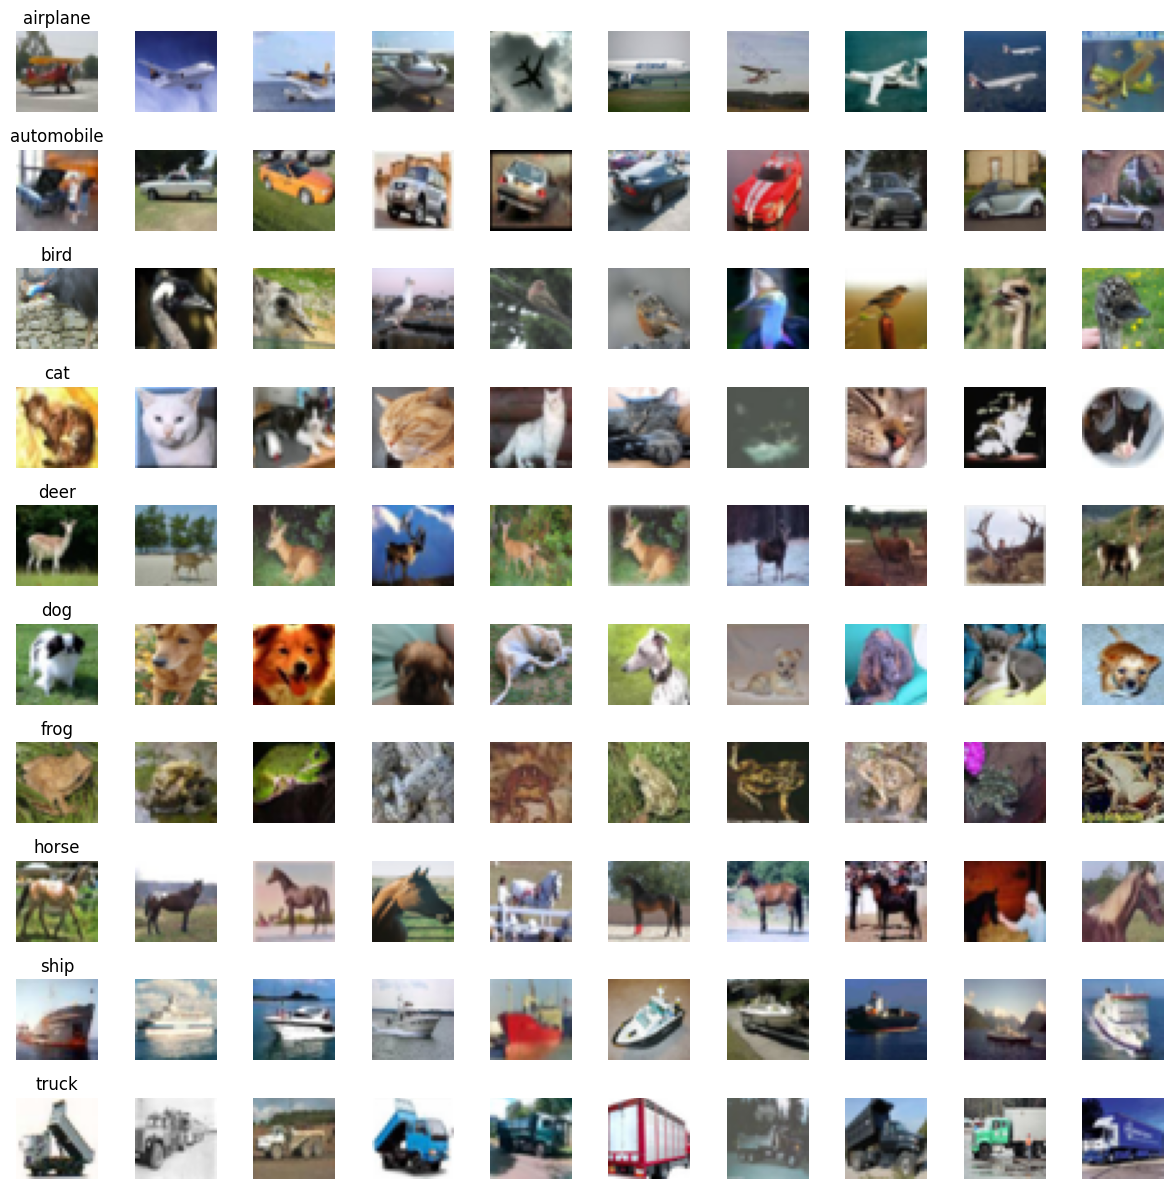

In [28]:
def visualize_samples(x, y):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    plt.figure(figsize=(12, 12))
    for class_id in range(10):
        # Find all indices for a specific class
        idxs = np.flatnonzero(y == class_id)
        # Randomly choose 10 samples from that class
        chosen = np.random.choice(idxs, 10, replace=False)
        for i, img_idx in enumerate(chosen):
            plt_idx = class_id * 10 + i + 1
            plt.subplot(10, 10, plt_idx)
            plt.imshow(x[img_idx])
            plt.axis('off')
            if i == 0:
                plt.title(class_names[class_id])
    plt.tight_layout()
    plt.show()

visualize_samples(x_train, y_train)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [29]:
from keras.backend import clear_session
clear_session()

In [30]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model with Input layer and Dropout
model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicit Input layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [31]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.backend import clear_session

# Clear previous model state
clear_session()

# Define the CNN model
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

# Compile the model with SGD optimizer and categorical crossentropy loss
model.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)

Epoch 1/50
98/98 - 6s - 61ms/step - accuracy: 0.1263 - loss: 2.2819 - val_accuracy: 0.1831 - val_loss: 2.2223
Epoch 2/50
98/98 - 6s - 59ms/step - accuracy: 0.1722 - loss: 2.2107 - val_accuracy: 0.2291 - val_loss: 2.1398
Epoch 3/50
98/98 - 1s - 10ms/step - accuracy: 0.1968 - loss: 2.1556 - val_accuracy: 0.2576 - val_loss: 2.0827
Epoch 4/50
98/98 - 1s - 10ms/step - accuracy: 0.2135 - loss: 2.1110 - val_accuracy: 0.2905 - val_loss: 2.0323
Epoch 5/50
98/98 - 1s - 10ms/step - accuracy: 0.2329 - loss: 2.0739 - val_accuracy: 0.3137 - val_loss: 1.9898
Epoch 6/50
98/98 - 1s - 10ms/step - accuracy: 0.2428 - loss: 2.0481 - val_accuracy: 0.3225 - val_loss: 1.9610
Epoch 7/50
98/98 - 1s - 12ms/step - accuracy: 0.2584 - loss: 2.0191 - val_accuracy: 0.3426 - val_loss: 1.9339
Epoch 8/50
98/98 - 1s - 11ms/step - accuracy: 0.2740 - loss: 1.9962 - val_accuracy: 0.3520 - val_loss: 1.9034
Epoch 9/50
98/98 - 1s - 12ms/step - accuracy: 0.2808 - loss: 1.9774 - val_accuracy: 0.3537 - val_loss: 1.8808
Epoch 10/5

*   Plot the cross entropy loss curve and the accuracy curve

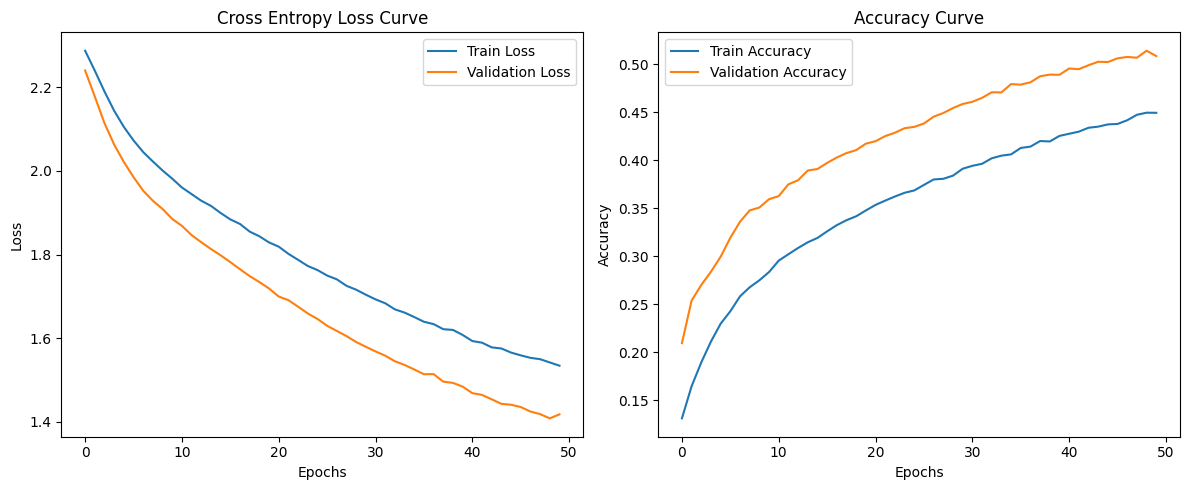

In [14]:
import matplotlib.pyplot as plt

# Plot Cross-Entropy Loss
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [15]:
from keras.backend import clear_session
clear_session()

In [18]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

# Define a deeper VGG-style model
model_vgg = Sequential([
    Input(shape=(32, 32, 3)),

    # First convolutional block (2 conv layers)
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),

    # Max pooling
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile with SGD and categorical crossentropy
model_vgg.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_vgg = model_vgg.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)

# Display final test accuracy
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(x_test_normalized, y_test_encoded, verbose=0)
print(f"Final Test Accuracy (VGG-style): {test_accuracy_vgg * 100:.2f}%")

Epoch 1/50
98/98 - 5s - 47ms/step - accuracy: 0.1673 - loss: 2.2517 - val_accuracy: 0.2163 - val_loss: 2.1872
Epoch 2/50
98/98 - 3s - 30ms/step - accuracy: 0.2450 - loss: 2.1124 - val_accuracy: 0.2721 - val_loss: 2.0434
Epoch 3/50
98/98 - 2s - 25ms/step - accuracy: 0.2935 - loss: 1.9993 - val_accuracy: 0.3093 - val_loss: 1.9533
Epoch 4/50
98/98 - 2s - 20ms/step - accuracy: 0.3207 - loss: 1.9354 - val_accuracy: 0.3514 - val_loss: 1.8716
Epoch 5/50
98/98 - 2s - 20ms/step - accuracy: 0.3398 - loss: 1.8783 - val_accuracy: 0.3506 - val_loss: 1.8418
Epoch 6/50
98/98 - 3s - 26ms/step - accuracy: 0.3627 - loss: 1.8200 - val_accuracy: 0.3689 - val_loss: 1.8001
Epoch 7/50
98/98 - 2s - 22ms/step - accuracy: 0.3773 - loss: 1.7796 - val_accuracy: 0.3685 - val_loss: 1.7643
Epoch 8/50
98/98 - 2s - 23ms/step - accuracy: 0.3885 - loss: 1.7490 - val_accuracy: 0.3960 - val_loss: 1.7199
Epoch 9/50
98/98 - 3s - 26ms/step - accuracy: 0.4009 - loss: 1.7123 - val_accuracy: 0.4124 - val_loss: 1.6786
Epoch 10/5

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [19]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.backend import clear_session

# Clear any previous model session
clear_session()

# Define the VGG-style model
model_vgg = Sequential([
    Input(shape=(32, 32, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),

    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_vgg.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_vgg = model_vgg.fit(
    x_train_normalized, y_train_encoded,
    epochs=50,
    batch_size=512,
    validation_data=(x_test_normalized, y_test_encoded),
    verbose=2
)

# Evaluate and show test accuracy
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(x_test_normalized, y_test_encoded, verbose=0)
print(f"Final Test Accuracy (VGG-style): {test_accuracy_vgg * 100:.2f}%")

Epoch 1/50
98/98 - 5s - 48ms/step - accuracy: 0.1926 - loss: 2.2346 - val_accuracy: 0.2578 - val_loss: 2.1395
Epoch 2/50
98/98 - 2s - 20ms/step - accuracy: 0.2772 - loss: 2.0532 - val_accuracy: 0.2977 - val_loss: 1.9976
Epoch 3/50
98/98 - 3s - 26ms/step - accuracy: 0.3126 - loss: 1.9506 - val_accuracy: 0.2971 - val_loss: 1.9811
Epoch 4/50
98/98 - 3s - 26ms/step - accuracy: 0.3374 - loss: 1.8924 - val_accuracy: 0.3406 - val_loss: 1.8874
Epoch 5/50
98/98 - 3s - 26ms/step - accuracy: 0.3568 - loss: 1.8368 - val_accuracy: 0.3649 - val_loss: 1.8066
Epoch 6/50
98/98 - 2s - 20ms/step - accuracy: 0.3689 - loss: 1.8004 - val_accuracy: 0.3712 - val_loss: 1.7654
Epoch 7/50
98/98 - 2s - 20ms/step - accuracy: 0.3824 - loss: 1.7608 - val_accuracy: 0.3884 - val_loss: 1.7472
Epoch 8/50
98/98 - 3s - 26ms/step - accuracy: 0.3937 - loss: 1.7294 - val_accuracy: 0.4001 - val_loss: 1.7016
Epoch 9/50
98/98 - 2s - 20ms/step - accuracy: 0.4060 - loss: 1.6999 - val_accuracy: 0.3920 - val_loss: 1.7301
Epoch 10/5

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


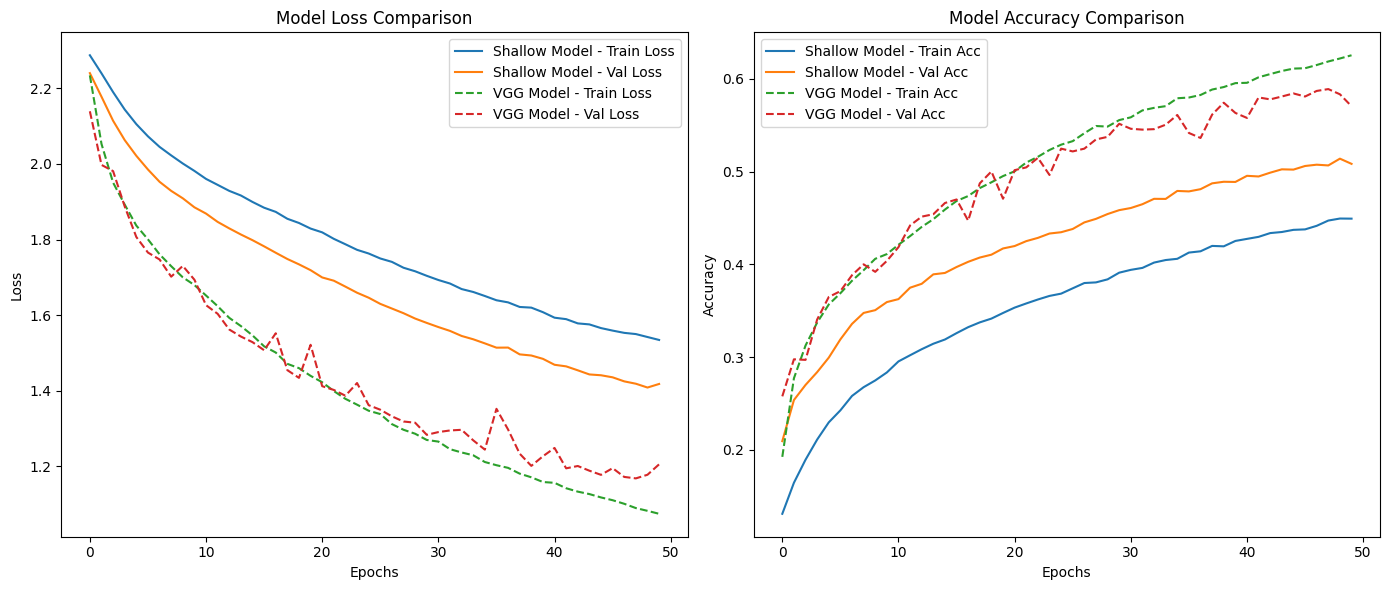

In [20]:
import matplotlib.pyplot as plt

# Plot comparison of Loss and Accuracy
plt.figure(figsize=(14, 6))

# --- Loss Curve ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Shallow Model - Train Loss')
plt.plot(history.history['val_loss'], label='Shallow Model - Val Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model - Train Loss', linestyle='--')
plt.plot(history_vgg.history['val_loss'], label='VGG Model - Val Loss', linestyle='--')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# --- Accuracy Curve ---
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Shallow Model - Train Acc')
plt.plot(history.history['val_accuracy'], label='Shallow Model - Val Acc')
plt.plot(history_vgg.history['accuracy'], label='VGG Model - Train Acc', linestyle='--')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model - Val Acc', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

The comparison between the shallow CNN model and the deeper VGG-style model reveals that the deeper architecture performs better overall. Specifically:

The VGG-style model shows higher training and validation accuracy throughout the 50 epochs.

It also maintains a lower validation loss, indicating better generalization to unseen data.

The added depth (two convolutional layers before pooling) allows the model to learn more complex features from the images, which is especially beneficial for a diverse dataset like CIFAR-10.

However, the deeper model may also:

Train more slowly, due to more layers and parameters.

Risk overfitting if not regularized properly (though dropout and max pooling help mitigate this).

Conclusion:
The VGG-style model, with its deeper structure and enhanced feature extraction, provides improved performance over the simpler CNN, making it a better choice for image classification tasks like CIFAR-10.



*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


<Figure size 1000x800 with 0 Axes>

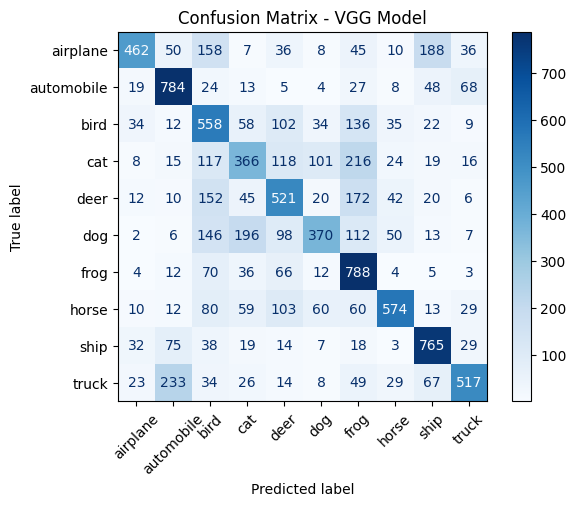

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict labels on test data
y_pred_probs = model_vgg.predict(x_test_normalized)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - VGG Model")
plt.show()

The confusion matrix shows that the model performs well on most classes, especially on "automobile", "ship", and "airplane". However, there is some confusion between similar-looking categories such as cat vs. dog, and deer vs. horse, which is expected due to visual similarities. Improving depth, adding data augmentation, or fine-tuning hyperparameters could reduce these misclassifications.

*    Print the test accuracy for the trained model.

In [23]:
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(x_test_normalized, y_test_encoded, verbose=0)
print(f"Final Test Accuracy (VGG Model): {test_accuracy_vgg * 100:.2f}%")

Final Test Accuracy (VGG Model): 57.05%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [24]:
import tensorflow as tf

# Resize training and test sets to 64x64
x_train_resized = tf.image.resize(x_train_normalized, [64, 64])
x_test_resized = tf.image.resize(x_test_normalized, [64, 64])


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [25]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
from keras.backend import clear_session

clear_session()

# Define complete VGG-style model
model_vgg_deep = Sequential([
    Input(shape=(64, 64, 3)),

    # Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Classification
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_vgg_deep.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_deep_vgg = model_vgg_deep.fit(
    x_train_resized, y_train_encoded,
    epochs=10,
    batch_size=512,
    validation_data=(x_test_resized, y_test_encoded),
    verbose=2
)

Epoch 1/10
98/98 - 106s - 1s/step - accuracy: 0.1076 - loss: 2.2992 - val_accuracy: 0.1339 - val_loss: 2.2947
Epoch 2/10
98/98 - 35s - 359ms/step - accuracy: 0.1382 - loss: 2.2863 - val_accuracy: 0.1731 - val_loss: 2.2704
Epoch 3/10
98/98 - 41s - 421ms/step - accuracy: 0.2010 - loss: 2.2182 - val_accuracy: 0.2630 - val_loss: 2.1089
Epoch 4/10
98/98 - 41s - 416ms/step - accuracy: 0.2448 - loss: 2.0935 - val_accuracy: 0.2786 - val_loss: 2.0302
Epoch 5/10
98/98 - 41s - 422ms/step - accuracy: 0.2822 - loss: 2.0112 - val_accuracy: 0.2814 - val_loss: 1.9996
Epoch 6/10
98/98 - 41s - 419ms/step - accuracy: 0.3107 - loss: 1.9469 - val_accuracy: 0.2956 - val_loss: 1.9185
Epoch 7/10
98/98 - 41s - 417ms/step - accuracy: 0.3303 - loss: 1.8966 - val_accuracy: 0.3048 - val_loss: 1.9519
Epoch 8/10
98/98 - 35s - 360ms/step - accuracy: 0.3486 - loss: 1.8349 - val_accuracy: 0.3566 - val_loss: 1.7780
Epoch 9/10
98/98 - 41s - 422ms/step - accuracy: 0.3632 - loss: 1.7988 - val_accuracy: 0.3949 - val_loss: 1

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

1 - Use of activation functions:

Activation functions introduce non-linearity into the network, which allows it to learn and represent more complex patterns beyond just linear relationships. Without activation functions, no matter how many layers you stack, the entire model would behave like a linear transformation. ReLU, sigmoid, and softmax are common activation functions that help the network make decisions by transforming the weighted sum of inputs in different ways.


2 - Key Differences between sigmoid and softmax:

Sigmoid:

Outputs a value between 0 and 1 for each neuron.

Each output is independent of the others.

Best for binary classification problems or for individual output units in multilabel classification.

Softmax:

Outputs a probability distribution across multiple classes.

All outputs sum to 1, making it ideal for multi-class classification.

Highlights the most confident prediction by pushing the highest logit closer to 1 and others to near 0.



3 - Key Differences between categorical crossentropy and binary crossentropy loss:


Binary Crossentropy:

Used for binary classification (2 classes) or multilabel classification.

Assumes each class is independent and applies the sigmoid function to each output unit.

Categorical Crossentropy:

Used for multi-class classification with one-hot encoded labels.

Applies the softmax function across all classes and compares the true label vector with the predicted probability distribution.

Assumes only one correct class per input.
